# Assignment 4 Cross Validation, Grid search

In [74]:
#Importing basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## 1. Load titanic.csv file. 

In [75]:
#importing the data
data=pd.read_csv(r"C:\Users\USER\Downloads\titanic (1).csv")

In [76]:
#displaying the first 5 rows
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [77]:
#checking for missing values
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## 2. Select 'Pclass','SibSp','Parch','Fare' columns as data. Select ‘Survived’ column as label. 

In [78]:
#selecting features and label
X=data[['Pclass','SibSp','Parch','Fare']]
y=data['Survived']

#Splitting data for training and testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

## 3. Apply Logistic regression, KNN, SVM, Decision tree and random forest to classify the data. 

### Logistic Regression

In [79]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
from sklearn.metrics import accuracy_score
print('Accuracy of Logistic Regression Classification Model is : ',round(100*accuracy_score(y_pred,y_test),2))

Accuracy of Logistic Regression Classification Model is :  71.51


### KNN

Text(0, 0.5, 'Accuracy')

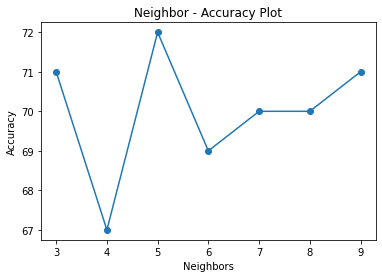

In [95]:
from sklearn.neighbors import KNeighborsClassifier
acc=[]
for i in range(3,10):
    knn=KNeighborsClassifier(n_neighbors=i,metric='minkowski') 
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    acc.append(round(100*accuracy_score(y_pred,y_test)))
plt.title('Neighbor - Accuracy Plot')
plt.plot(range(3,10),acc,'o-')
plt.xlabel('Neighbors')
plt.ylabel('Accuracy')

Accuracy is higher when number of neighbors is 5

In [81]:
knn=KNeighborsClassifier(n_neighbors=5,metric='minkowski')
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print('Accuracy of K Nearest Neighbors Classification Model is : ',round(100*accuracy_score(y_pred,y_test),2))

Accuracy of K Nearest Neighbors Classification Model is :  71.51


### SVM

In [82]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print('Accuracy of Support Vector Machine classification Model is : ',round(100*accuracy_score(y_pred,y_test),2))

Accuracy of Support Vector Machine classification Model is :  65.36


### DecisionTree

In [83]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)
y_pred=dtc.predict(X_test)
print('Accuracy of Decision Tree Classification Model is : ',round(100*accuracy_score(y_pred,y_test),2))

Accuracy of Decision Tree Classification Model is :  69.27


### Random Forest

In [84]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred=rfc.predict(X_test)
print('Accuracy of Random Forest Classification Model is : ',round(100*accuracy_score(y_pred,y_test),2))

Accuracy of Random Forest Classification Model is :  70.39


## 4. Use K-Fold Cross Validation to generalise the model accuracy. 

### Kfolds

#### KFolds - Logistic Regression

In [85]:
from sklearn.model_selection import cross_val_score,KFold
model = LogisticRegression()
kf=KFold(n_splits=5)
score=cross_val_score(model,X,y,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.62569832 0.66853933 0.66853933 0.69662921 0.75280899]
Average Cross Validation score :0.6824430355909861


#### KFolds - K nearest Neighbor

In [86]:
model = KNeighborsClassifier(n_neighbors=i,metric='minkowski')
kf=KFold(n_splits=5)
score=cross_val_score(model,X,y,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.56424581 0.64044944 0.69662921 0.7247191  0.76966292]
Average Cross Validation score :0.6791412968426339


#### KFolds - Support vector machine

In [87]:
model = SVC()
kf=KFold(n_splits=5)
score=cross_val_score(model,X,y,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.62011173 0.66853933 0.66853933 0.66292135 0.70786517]
Average Cross Validation score :0.6655953800765803


#### KFolds - Decision tree

In [88]:
model = DecisionTreeClassifier()
kf=KFold(n_splits=5)
score=cross_val_score(model,X,y,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.67597765 0.62921348 0.69662921 0.71348315 0.73033708]
Average Cross Validation score :0.6891281149959199


#### KFolds - Random forest

In [89]:
model = RandomForestClassifier()
kf=KFold(n_splits=5)
score=cross_val_score(model,X,y,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.64804469 0.63483146 0.69662921 0.74157303 0.73595506]
Average Cross Validation score :0.6914066913564747


## 5. Use grid search to identify the best possible SVM model from the following search space. 
'C': [0.1, 1, 10, 100, 1000], 

'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 

'kernel': ['rbf']


In [90]:
#setting the parameters
parameters={'C': [0.1, 1, 10, 100, 1000], 
'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
'kernel': ['rbf']}

In [91]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(SVC(), 
    parameters, 
    cv=5,
    scoring='accuracy',n_jobs=-1)

In [92]:
grid_result= grid_search.fit(X_train, y_train)
print('Best Params: ', grid_result.best_params_)
print('Best Score: ', grid_result.best_score_)

Best Params:  {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
Best Score:  0.6994385895794347
